In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv("test.csv")
df.shape

(2947, 563)

In [4]:
print("Columns:", df.columns.tolist()[:5], "...")
print("Shape:", df.shape)

X = df.iloc[:, :-1]  # features
y = df.iloc[:, -1]   # labels

print("Unique activities:", y.unique())
print("Activity distribution:\n", y.value_counts())

Columns: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y'] ...
Shape: (2947, 563)
Unique activities: ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
Activity distribution:
 Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:2]

array([[-0.2777081 , -0.21063123,  2.19307573, ...,  0.62272321,
        -0.0383485 , -1.58082533],
       [ 0.19865964,  0.18259066, -0.25026383, ...,  0.63673075,
        -0.14570918, -1.58082533]], shape=(2, 562))

In [6]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Number of components to retain 90% and 95%
components_90 = np.argmax(cumulative_var >= 0.90) + 1
components_95 = np.argmax(cumulative_var >= 0.95) + 1
print(f"Components for 90% variance: {components_90}")
print(f"Components for 95% variance: {components_95}")

Components for 90% variance: 62
Components for 95% variance: 99


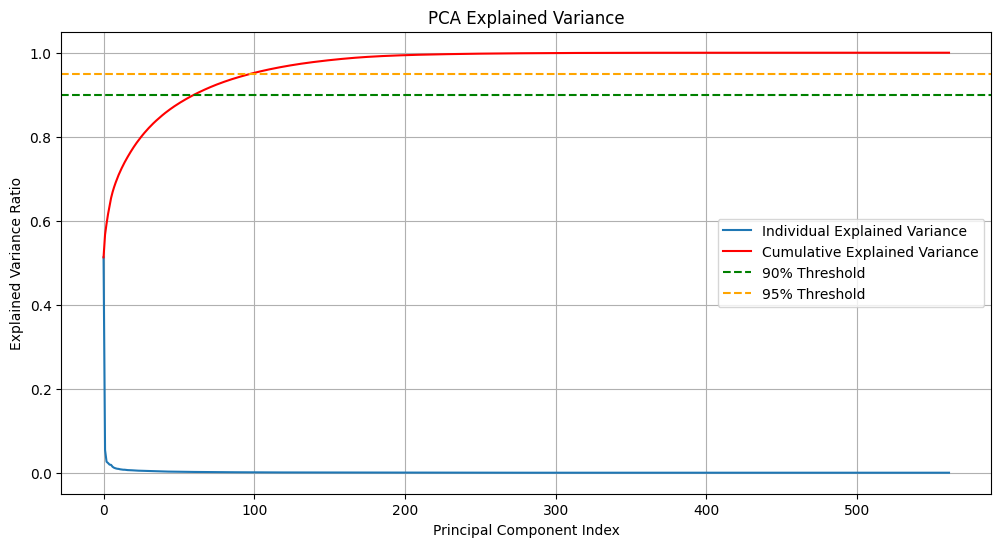

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(explained_var, label='Individual Explained Variance')
plt.plot(cumulative_var, label='Cumulative Explained Variance', color='red')
plt.axhline(0.90, color='green', linestyle='--', label='90% Threshold')
plt.axhline(0.95, color='orange', linestyle='--', label='95% Threshold')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

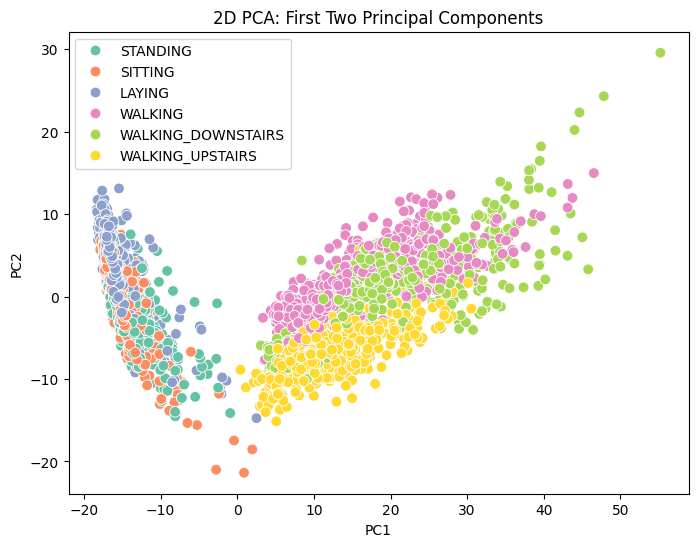

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2', s=60)
plt.title('2D PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.show()

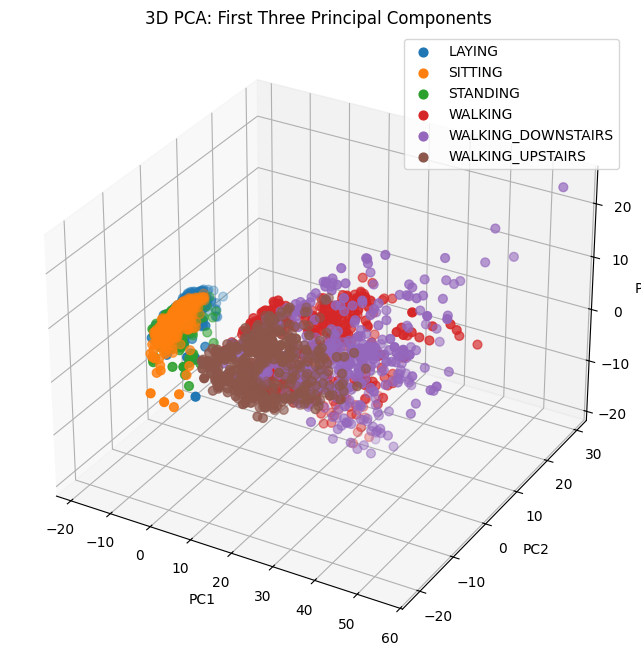

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for activity in np.unique(y):
    idx = y == activity
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2], label=activity, s=40)
ax.set_title('3D PCA: First Three Principal Components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()